In [510]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib_inline.backend_inline

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.datasets import load_breast_cancer
from sklearn.datasets import load_digits

import tensorflow
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Flatten

import random

In [511]:
matplotlib_inline.backend_inline.set_matplotlib_formats("retina") # svg, retina, png2x ...
mpl.style.use("seaborn-v0_8")
mpl.rcParams.update({"figure.constrained_layout.use": True})
sns.set_context("paper") 
sns.set_palette("Set2") 
sns.set_style("whitegrid") 

plt.rc("font", family = "Malgun Gothic")
plt.rcParams["axes.unicode_minus"] = False

In [512]:
# import os
# import tensorflow as tf
# from tensorflow.python.client import device_lib
# os.environ["CUDA_VISIBLE_DEVICES"] = "0"

# print(device_lib.list_local_devices())

In [513]:
random.seed(42) # 동일한 결과값을 위한 시드값

input_node = 4 # 입력 노드
output_node = 3 # 출력 노드

model_simple = Sequential()
model_simple.add(Dense(output_node,
                       activation = "softmax",
                       input_shape = (input_node,),
                       ))

model_simple.weights

[<tf.Variable 'dense_81/kernel:0' shape=(4, 3) dtype=float32, numpy=
 array([[ 0.66323733,  0.30112958, -0.26161683],
        [ 0.8332188 , -0.781279  ,  0.28206468],
        [ 0.8711965 , -0.61490726,  0.0440492 ],
        [ 0.24211967, -0.7658045 , -0.09932661]], dtype=float32)>,
 <tf.Variable 'dense_81/bias:0' shape=(3,) dtype=float32, numpy=array([0., 0., 0.], dtype=float32)>]

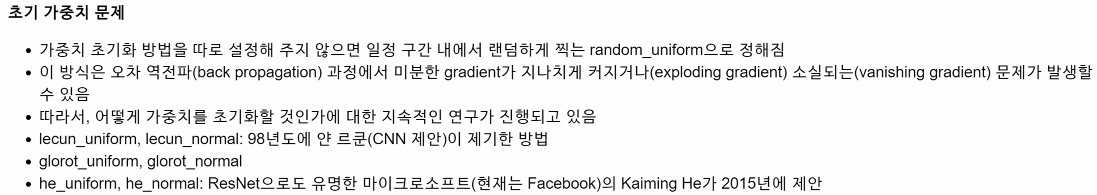

In [514]:
# !nvidia-smi
# import tensorflow as tf; print(tf.config.list_physical_devices('GPU'))

In [515]:
cancer = load_breast_cancer()
X = cancer["data"]
y = cancer["target"]

x_train,x_test,y_train,y_test = train_test_split(X,y,
                                                 test_size=0.2,
                                                 random_state=42,
                                                 stratify=y)

In [516]:
minmax = MinMaxScaler()
x_train_scaled = minmax.fit_transform(x_train)
x_test_scaled = minmax.fit_transform(x_test)

In [517]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(455, 30)
(455,)
(114, 30)
(114,)


In [518]:
random.seed(42)

model_2 = Sequential()
model_2.add(Dense(1,
                #   kernel_initializer= 'he_normal', # he_nomal
                  activation = "sigmoid",
                  input_shape = (30, )),)

model_2.summary()


Model: "sequential_76"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_82 (Dense)            (None, 1)                 31        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [519]:
init_weight = model_2.get_weights()

In [520]:
model_2.compile(loss="binary_crossentropy",
                optimizer="adam",
                metrics=["accuracy"])

history = model_2.fit(x_train_scaled, y_train,
                      epochs=10,
                      batch_size = 10,
                      validation_split=0.2,
                      verbose = "auto")

Epoch 1/10
37/37 [==============================] - 1s 4ms/step - loss: 0.6912 - accuracy: 0.5907 - val_loss: 0.6886 - val_accuracy: 0.5275
Epoch 2/10
37/37 [==============================] - 0s 2ms/step - loss: 0.6777 - accuracy: 0.6429 - val_loss: 0.6743 - val_accuracy: 0.6264
Epoch 3/10
37/37 [==============================] - 0s 2ms/step - loss: 0.6652 - accuracy: 0.7088 - val_loss: 0.6610 - val_accuracy: 0.6923
Epoch 4/10
37/37 [==============================] - 0s 2ms/step - loss: 0.6533 - accuracy: 0.7720 - val_loss: 0.6486 - val_accuracy: 0.7582
Epoch 5/10
37/37 [==============================] - 0s 2ms/step - loss: 0.6414 - accuracy: 0.7857 - val_loss: 0.6370 - val_accuracy: 0.7802
Epoch 6/10
37/37 [==============================] - 0s 1ms/step - loss: 0.6305 - accuracy: 0.8104 - val_loss: 0.6257 - val_accuracy: 0.8022
Epoch 7/10
37/37 [==============================] - 0s 1ms/step - loss: 0.6194 - accuracy: 0.8214 - val_loss: 0.6155 - val_accuracy: 0.8132
Epoch 8/10
37/37 [==

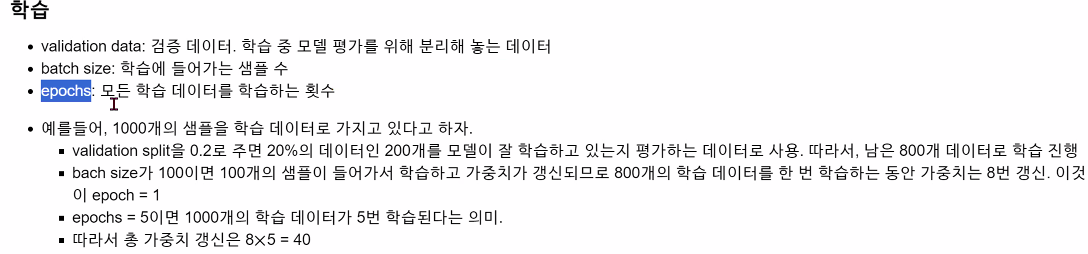

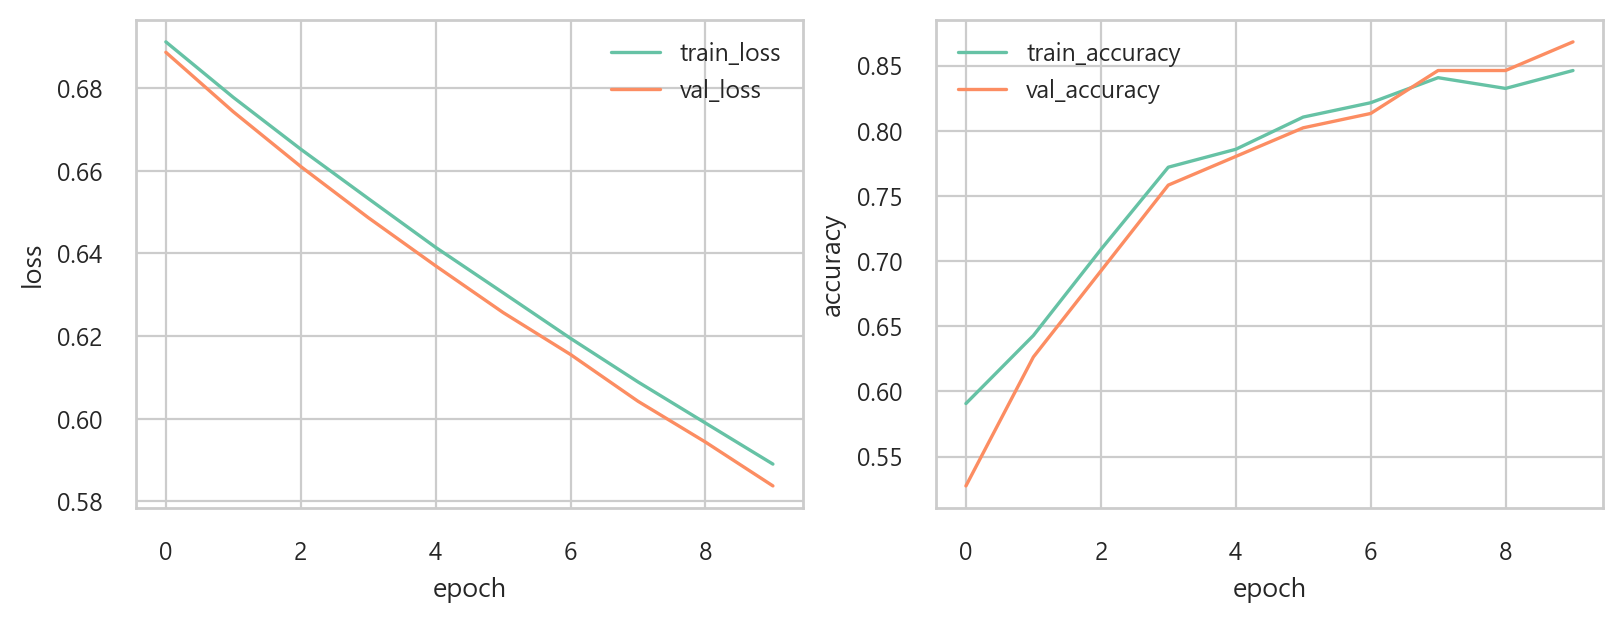

In [521]:
fig, ax = plt.subplots(1,2, figsize = (8,3))

ax[0].plot(history.history["loss"] , label = "train_loss")
ax[0].plot(history.history["val_loss"] , label = "val_loss")
ax[0].set(xlabel = "epoch", ylabel= "loss")
ax[0].legend()

ax[1].plot(history.history["accuracy"] , label = "train_accuracy")
ax[1].plot(history.history["val_accuracy"] , label = "val_accuracy")
ax[1].set(xlabel = "epoch", ylabel= "accuracy")
ax[1].legend()

In [522]:
metrics.accuracy_score(model_2.predict(x_test_scaled).flatten() >= 0.5,y_test)

4/4 [==============================] - 0s 1ms/step


0.8596491228070176

### 다중 분류

In [523]:
digits = load_digits()

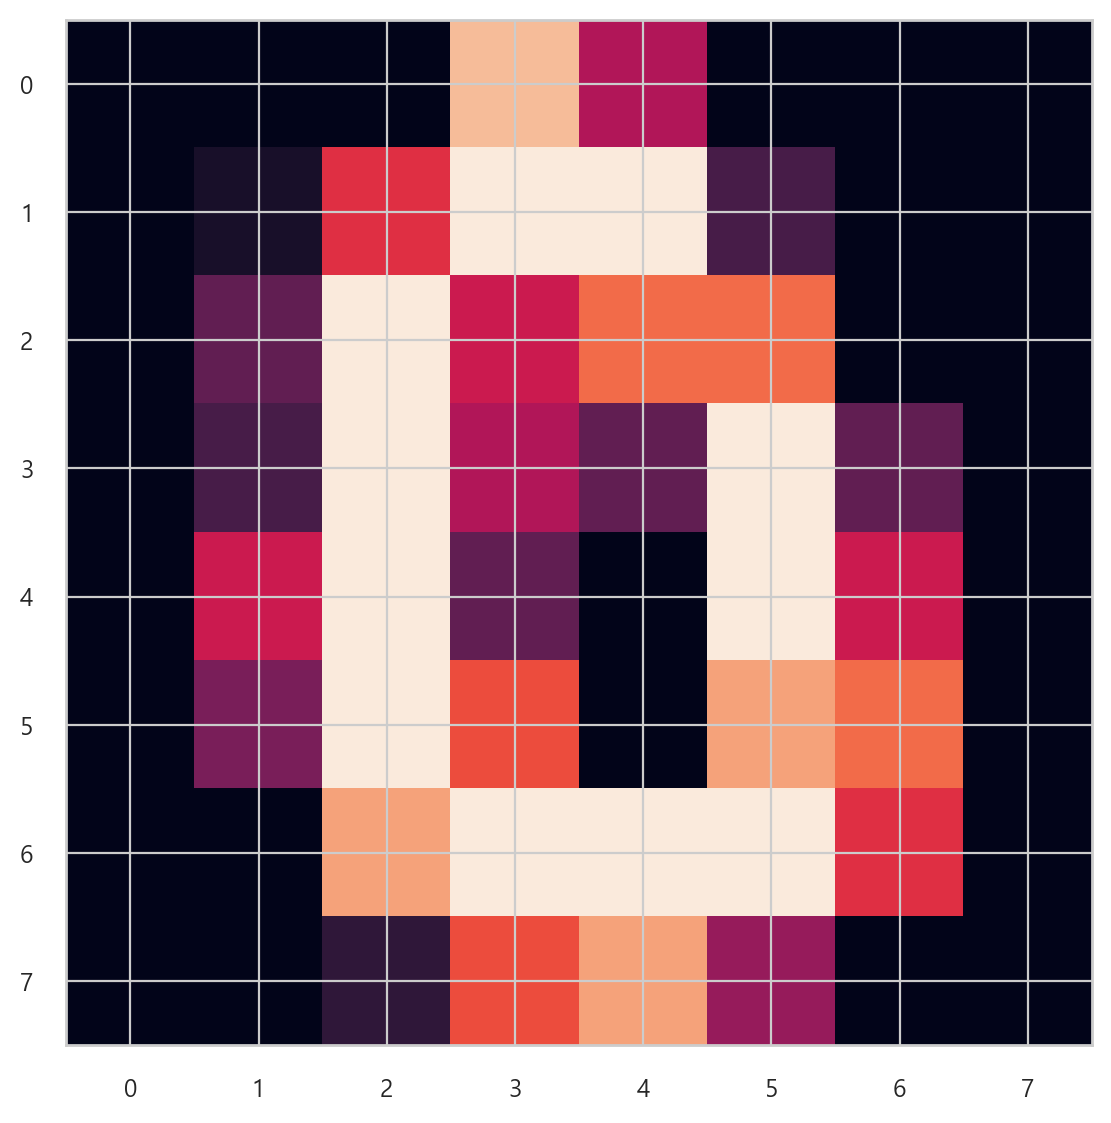

In [524]:
plt.imshow(digits.images[209])

In [525]:
x_data = digits["images"]
y_data = digits["target"]

In [526]:
np.unique(y_data, return_counts=True) # 각 라벨별 갯수

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([178, 182, 177, 183, 181, 182, 181, 179, 174, 180], dtype=int64))

In [527]:
x_train,x_test,y_train,y_test = train_test_split(x_data,y_data,
                                                 test_size=0.2,
                                                 random_state=42,
                                                 stratify=y_data)

In [528]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(1437, 8, 8)
(1437,)
(360, 8, 8)
(360,)


In [529]:
x_train, x_test = x_train / x_train.max(), x_test / x_train.max()

In [530]:
x_train_re = x_train.reshape(x_train.shape[0], 64)
x_test_re = x_test.reshape(x_test.shape[0], 64)

In [531]:
# 원핫 인코딩
y_train = to_categorical(y_train)
# y_test = to_categorical(y_test)

In [532]:
print(x_train_re.shape)
print(y_train.shape)
print(x_test_re.shape)
print(y_test.shape)

(1437, 64)
(1437, 10)
(360, 64)
(360,)


In [533]:
random.seed(42)

model_3 = Sequential()
model_3.add(Dense(10,
                #   kernel_initializer= 'he_normal', # he_nomal
                  activation = "softmax",
                  input_shape = (64, )),)

model_3.compile(loss="categorical_crossentropy",
                optimizer="adam",
                metrics=["accuracy"])
model_3.summary()

Model: "sequential_77"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   


 dense_83 (Dense)            (None, 10)                650       
                                                                 
Total params: 650 (2.54 KB)
Trainable params: 650 (2.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


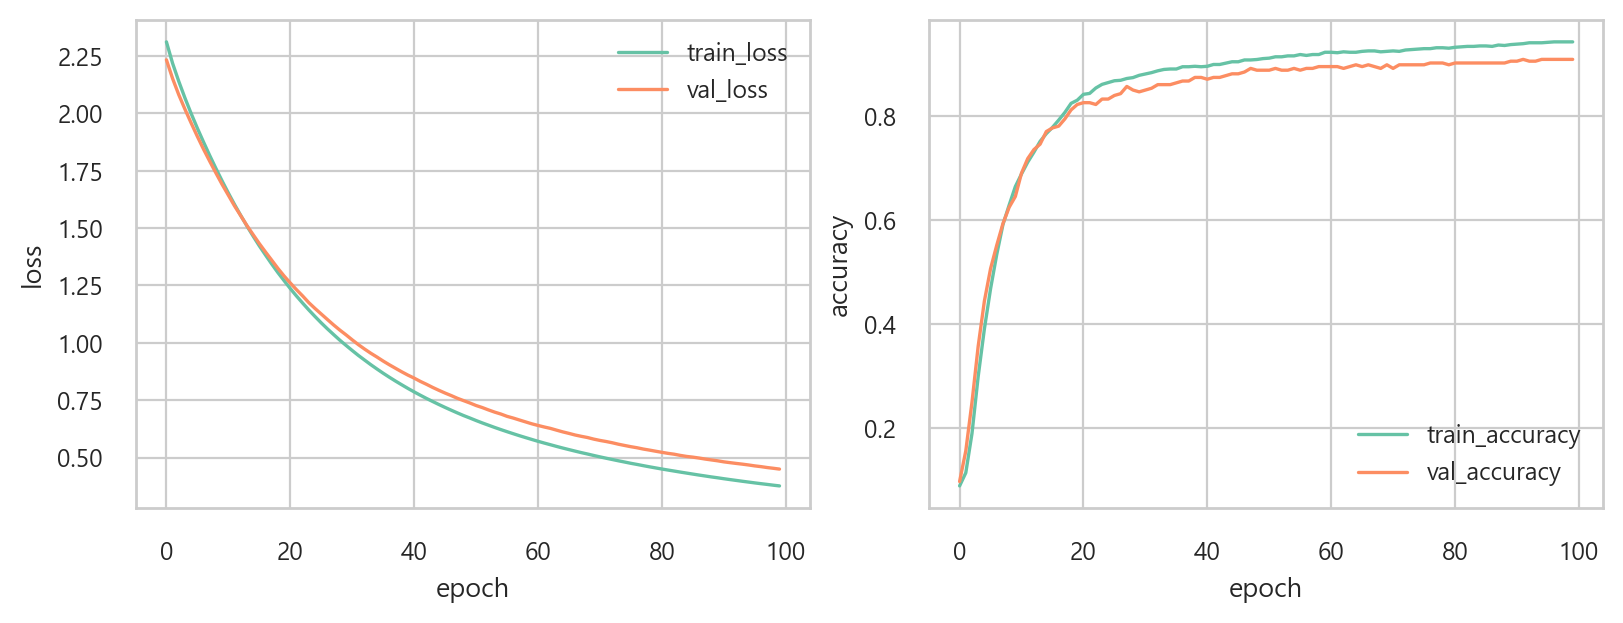

In [534]:
history = model_3.fit(x_train_re, y_train,
                      epochs=100,
                      batch_size = 100,
                      validation_split=0.2,
                      verbose = 0)

fig, ax = plt.subplots(1,2, figsize = (8,3))

ax[0].plot(history.history["loss"] , label = "train_loss")
ax[0].plot(history.history["val_loss"] , label = "val_loss")
ax[0].set(xlabel = "epoch", ylabel= "loss")
ax[0].legend()

ax[1].plot(history.history["accuracy"] , label = "train_accuracy")
ax[1].plot(history.history["val_accuracy"] , label = "val_accuracy")
ax[1].set(xlabel = "epoch", ylabel= "accuracy")
ax[1].legend()

In [535]:
pred = [np.argmax(i) for i in model_3.predict(x_test_re)]

metrics.accuracy_score(pred, y_test)

12/12 [==============================] - 0s 640us/step


0.9277777777777778

In [536]:
model_3.save("../model/digit_classifier.h5")

c:\Users\crazy\miniconda3\envs\kdt\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [537]:
model_loaded = load_model("../model/digit_classifier.h5")

In [538]:
model_loaded.summary()

Model: "sequential_77"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_83 (Dense)            (None, 10)                650       
                                                                 
Total params: 650 (2.54 KB)
Trainable params: 650 (2.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [539]:
model_loaded.get_weights()

[array([[ 2.03986824e-01,  9.26161110e-02, -8.04634839e-02,
          2.56266683e-01, -2.40291998e-01,  8.67524445e-02,
          2.67947227e-01, -1.89122319e-01,  1.35478675e-02,
          7.44669139e-02],
        [-7.75003493e-01, -6.38739228e-01,  5.34770370e-01,
          4.21325773e-01, -4.45702612e-01,  7.06141174e-01,
         -7.65812695e-01, -4.22732264e-01, -4.58097517e-01,
         -7.30737567e-01],
        [-5.67228198e-01, -3.41963410e-01,  5.61722815e-01,
          2.10730061e-01, -3.57099861e-01,  4.53272969e-01,
         -5.78947484e-01,  1.76023304e-01, -3.30620348e-01,
          1.07804816e-02],
        [ 1.18552353e-02, -2.13876575e-01,  2.73251012e-02,
          1.66109219e-01, -5.19880652e-01, -2.69827358e-02,
         -7.01105595e-02,  1.34021431e-01, -9.50434580e-02,
          2.05320001e-01],
        [-3.73552531e-01, -4.68356490e-01, -1.50381818e-01,
          2.93502510e-01,  1.62515447e-01,  2.15993479e-01,
         -2.64041901e-01,  1.94500923e-01, -1.790553